In [10]:
import pandas as pd
import seaborn as sn
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [11]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [3]:
lower_limit,upper_limit = df.price_per_sqft.quantile([0.001 , 0.999])
lower_limit , upper_limit

(1366.184, 50959.36200000098)

In [4]:
outliers = df[(df.price_per_sqft > upper_limit) | (df.price_per_sqft < lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
8300,Kengeri,1 BHK,1200.0,1.0,14.0,1,1166
8307,Bannerghatta Road,5 BHK,2500.0,4.0,1400.0,5,56000
5343,other,9 BHK,42000.0,8.0,175.0,9,416
12355,other,4 BHK,16335.0,4.0,149.0,4,912
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
3934,other,1 BHK,1500.0,1.0,19.5,1,1300


In [5]:

df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

(13172, 7)

In [6]:
df.shape

(13200, 7)

In [7]:
df.shape[0] - df2.shape[0]

28

In [12]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589432, -9900.429065502582)

In [15]:
df2[(df2.price_per_sqft>max_limit)|(df2.price_per_sqft<min_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [23]:
df3 = df2[(df2.price_per_sqft<max_limit)&(df2.price_per_sqft>min_limit)]
df3.shape
df2.shape[0] - df3.shape[0]

125

<Axes: xlabel='price_per_sqft', ylabel='Count'>

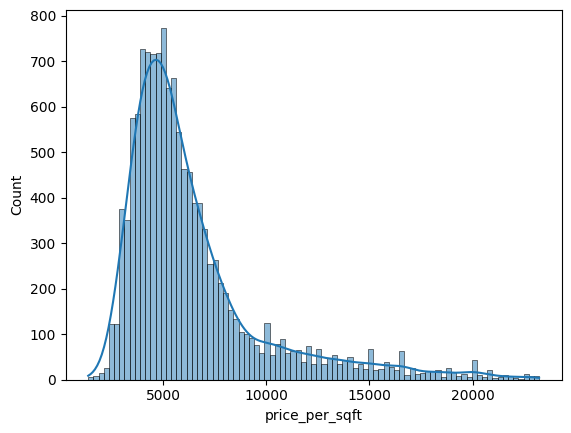

In [24]:
sn.histplot(df3.price_per_sqft, kde=True)

In [52]:
df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean()) / df2.price_per_sqft.std()

df2.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
2097,Varthur,2 BHK,1112.0,2.0,40.00,2,3597,-0.740555
3569,other,4 Bedroom,1200.0,4.0,110.00,4,9166,0.604282
10865,1st Block Jayanagar,4 BHK,2450.0,4.0,368.00,4,15020,2.017944
4288,Whitefield,2 BHK,1415.0,2.0,67.00,2,4734,-0.465985
3885,other,3 BHK,1650.0,2.0,52.00,3,3151,-0.848258
2951,Frazer Town,3 BHK,2350.0,4.0,285.00,3,12127,1.319324
1613,AECS Layout,2 BHK,1028.0,2.0,42.00,2,4085,-0.622710
1168,Harlur,4 Bedroom,1200.0,4.0,244.00,4,20333,3.300961
1508,Thigalarapalya,2 BHK,1297.0,2.0,112.00,2,8635,0.476053
10313,Electronic City Phase II,2 BHK,1160.0,2.0,33.51,2,2888,-0.911769


In [53]:

outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [54]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [55]:
df2.shape[0] - df4.shape[0]

125